In [2]:
from modifier import Modifier
from global_settings import sumovsls

def modifier_sumo(interval_list, modifier_list):
        # Get interval [1.25, 2.75]
        # Get the values from the modifier array for the interval ID,[value,...]
        # Resample traffic volume with different granularity
        interval_ids = [[int(num) for num in interval] for interval in interval_list]
        mlist = []
        for interval in interval_ids:
            ids = []
            volume = []
            print(f"Print interval {interval}")
            # Get traffic volume for each id
            # We assume, constant volume per interval
            start = modifier_list[interval[0]-1][1][0]
            end = modifier_list[interval[1]-1][1][0]
            # Create step for traffic volume
            step = 25
            for value in range(start, end, step):
                volume.append(value)

            ids = Modifier.rescale(volume,interval[0],interval[1])
            print(f"volume {volume}")
            for i in range(0,len(ids)-1):
                mlist.append([ids[i],[volume[i]]*90])
            print(f"MOD list {mlist}")
        return mlist

In [10]:
# SUMO vsl
from controller_modifier_scenarios import Controller
import numpy as np
from components_configuration import components

modlist = Controller.get_list_of_modifiers(10)
modlist

[[1,
  [2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900]],
 [2,
  [3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000

In [4]:
import numpy as np
from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_novsl'])

Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds


KeyboardInterrupt: 

In [3]:
mod_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
l = [[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]]
l= [[2600.0, 2675.714285714286]]
m = [ [i,[i]*3] for i in l[0]]
m

[[2600.0, [2600.0, 2600.0, 2600.0]],
 [2675.714285714286,
  [2675.714285714286, 2675.714285714286, 2675.714285714286]]]

In [4]:
sim_y_list = [386.6527777777778,
 407.91666666666674,
 423.98611111111103,
 446.8888888888889,
 481.0694444444444,
 532.4027777777778,
 556.4999999999999,
 613.8194444444445,
 701.0416666666665,
 733.1666666666663]

In [1]:
import numpy as np
from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]
# ModifierA np.array(x) ** 2
# ModifierB x * 2 / 3
mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifierA'], do_plot=simexSettings['do_plot'])
mod_x_list = mod_outcome[0]
checked_intervals = mod_outcome[1]
print("MAIN mod outcome", mod_outcome) 
print(f"MODXLIST {mod_x_list} checked intervals {checked_intervals}")

Modifier...
[MODC]: intervals list:  [[2500, 4500]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4500)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]
[MODC]: mod_x:  [2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]
MAIN mod outcome ([[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]], [[2500, 4500]])
MODXLIST [[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573

In [2]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True
# Initialize interval list for the first iteration
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]
#intervals_list=[[2900, 3200]]


while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifierA'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    print("MAIN mod outcome", mod_outcome)  

    
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = SimulatorController.simulate(mod_x_list,selected_simulator=components['sumo_simulator'])
    print(f"MODX {mod_x} and sim_y_list {sim_y_list}")
    assert len(mod_x) == len(sim_y_list)

    print("MAIN modx", mod_x)  

    # Calls Validator controller
    intervals_list =  validator_controller.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[mds["domain_min_interval"], mds["domain_max_interval"]])
    print("MAIN interval list from VAL:", intervals_list)
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

Modifier...
[MODC]: intervals list:  [[2500, 4500]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4500)
[MODC]: mod_ticks:  [2580, 2660, 2740, 2820, 2900, 2980, 3060, 3140, 3220, 3300, 3380, 3460, 3540, 3620, 3700, 3780, 3860, 3940, 4020, 4100, 4180, 4260, 4340, 4420]
[MODC]: mod_x:  [2580.0, 2639.885714285714, 2701.6, 2765.1428571428573, 2830.5142857142855, 2897.714285714286, 2966.7428571428572, 3037.6, 3110.285714285714, 3184.8, 3261.142857142857, 3339.3142857142857, 3419.3142857142857, 3501.142857142857, 3584.8, 3670.285714285714, 3757.6, 3846.7428571428572, 3937.714285714286, 4030.5142857142855, 4125.142857142857, 4221.6, 4319.885714285714, 4420.0]
MAIN mod outcome ([[2580.0, 2639.885714285714, 2701.6, 2765.1428571428573, 2830.5142857142855, 2897.714285714286, 2966.7428571428572, 3037.6, 3110.285714285714, 3184.8, 3261.142857142857, 3339.3142857142857, 3419.3142857142857, 3501.142857142857, 3584.8, 3670.285714285714, 3757.6, 3846.7428571428572, 3937.714285714286, 4030.514

KeyboardInterrupt: 

Modifier...
[MODC]: intervals list:  [[2500, 4500]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4500)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]
[MODC]: mod_x:  [2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]
MAIN mod outcome ([[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]], [[2500, 4500]])
Simulator... [[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.142857142

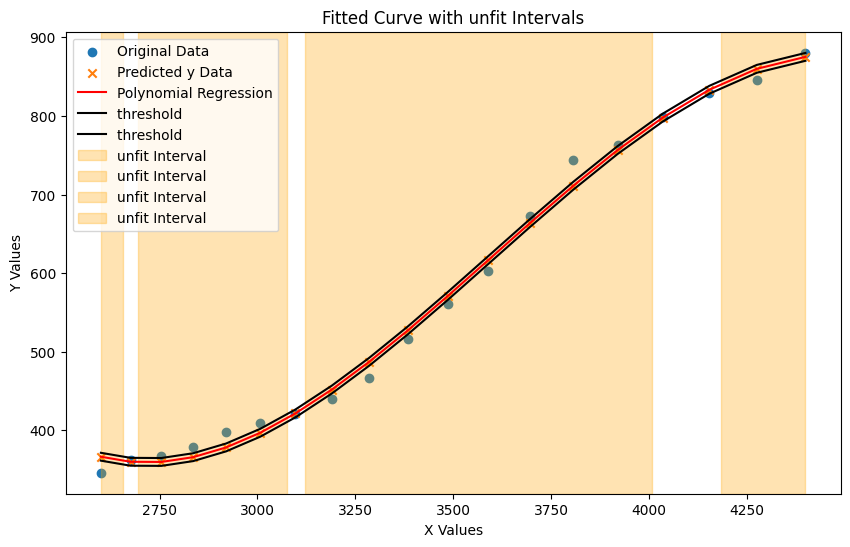

MAIN interval list from VAL: [[2600.0, 2656.785714285714], [2695.357142857143, 3074.6428571428573], [3120.357142857143, 4006.785714285714], [4184.642857142857, 4400.0]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [2695.357142857143, 3074.6428571428573], [3120.357142857143, 4006.785714285714], [4184.642857142857, 4400.0]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (2695.357142857143, 3074.6428571428573)
[MODC]: mod_ticks:  [2696, 2794, 2892, 2990]
[MODC]: mod_x:  [2696.0, 2790.621878297573, 2888.621878297573, 2990.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3120.357142857143, 4006.785714285714)
[MODC]: mod_ticks:  [3186, 3284, 3382, 3480, 3578, 3676, 3774, 3872, 3970]
[MODC]: mod_x:  [3186.0, 3274.6053661263277, 3365.8949133594188, 3459.868641699273, 3556.5265511458915, 3655.868641699273, 3757.8949133594188, 3862.6053661263277, 3970.0]
[MODC]: (interval_min_tick, interval_m

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


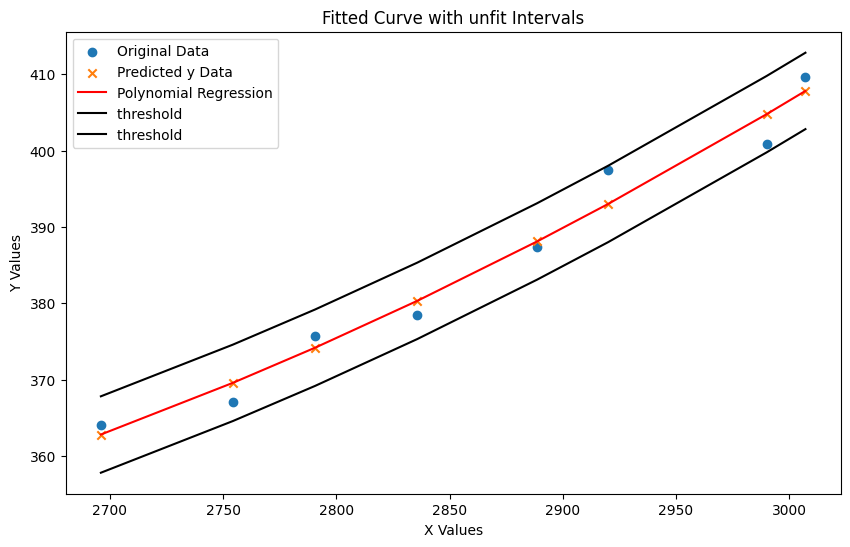

equation,
 y =  0.00011272879536993121x^2  -0.4983827093549981x^1 + 887.1109609892538 
unfit_points
 [(2696.0, 364.1111111111112), (2754.285714285714, 367.0416666666668), (2790.621878297573, 375.6805555555554), (2835.714285714286, 378.5277777777778), (2888.621878297573, 387.4027777777778), (2920.0, 397.38888888888897), (2990.0, 400.87500000000006), (3007.1428571428573, 409.5694444444444)] 
local_unfit_interval
, [[2695.357142857143, 3074.6428571428573]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3120.357142857143, 3186.0]]


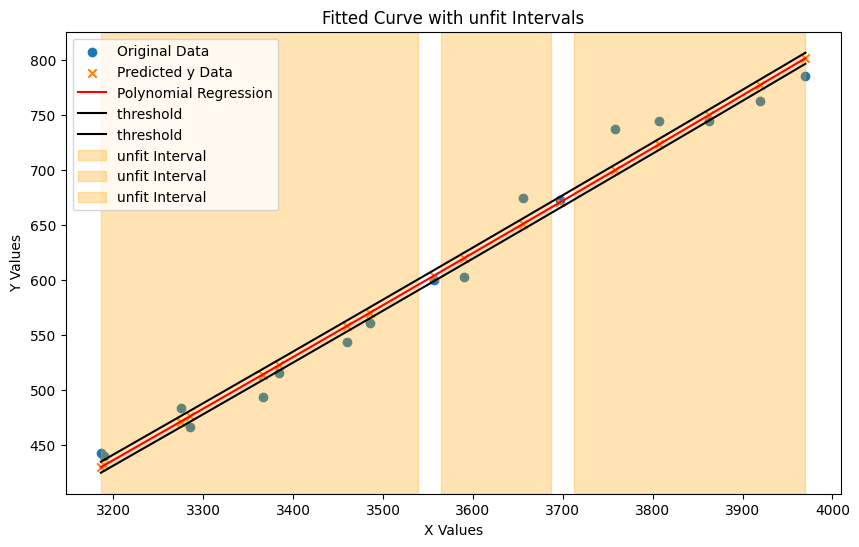

equation,
 y =  1.0628515959947987e-05x^2 + 0.39729773665638063x^1  -943.5912677628818 
unfit_points
 [(3186.0, 443.0555555555555), (3190.0, 440.16666666666646), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3365.8949133594188, 493.4444444444443), (3384.285714285714, 515.6805555555555), (3459.868641699273, 543.5833333333335), (3485.714285714286, 561.0277777777779), (3556.5265511458915, 599.8472222222223), (3590.0, 602.8888888888887), (3655.868641699273, 674.0138888888888), (3697.142857142857, 672.763888888889), (3757.8949133594188, 737.2777777777777), (3807.142857142857, 744.2916666666672), (3862.6053661263277, 744.3611111111111), (3920.0, 762.4861111111111), (3970.0, 785.3055555555554)] 
local_unfit_interval
, [[3120.357142857143, 3186.0], [3538.8234847879903, 3564.8949133594188], [3686.824303281961, 3712.3308711969976], [3970.0, 4006.785714285714]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


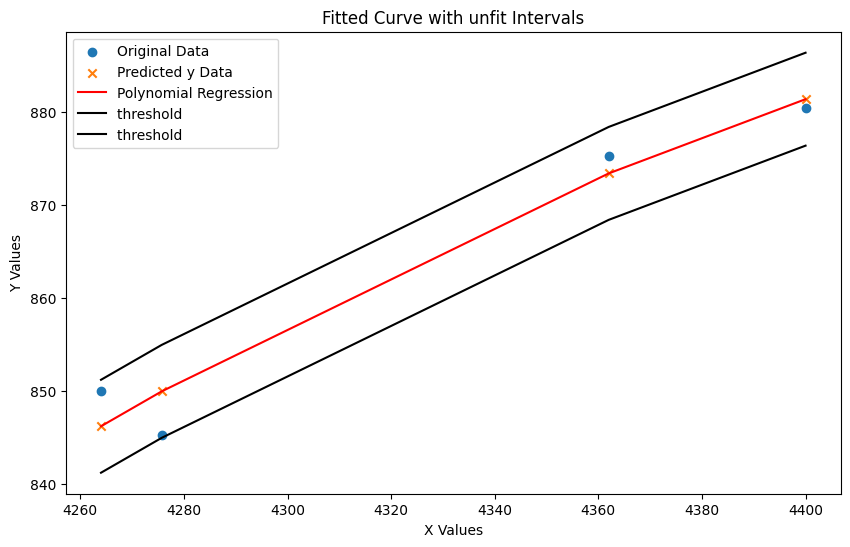

equation,
 y =  -0.0004962389381331597x^2 + 4.558198948480041x^1  -9567.491143425626 
unfit_points
 [(4264.0, 850.0138888888889), (4275.714285714286, 845.2222222222223), (4362.0, 875.2638888888889), (4400.0, 880.4722222222222)] 
local_unfit_interval
, [[4184.642857142857, 4400.0]]
DIFFERENCES 
each_interval  [4184.642857142857, 4400.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3186.0, 3538.8234847879903], [3564.8949133594188, 3686.824303281961], [3712.3308711969976, 3970.0]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3186.0, 3538.8234847879903], [3564.8949133594188, 3686.824303281961], [3712.3308711969976, 3970.0]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3186.0, 3538.8234847879903)
[MODC]: mod_ticks:  [3268, 3364, 3460]
[MODC]: mod_x:  [3268.0, 3362.630202140309, 3460.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3564.89491335

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


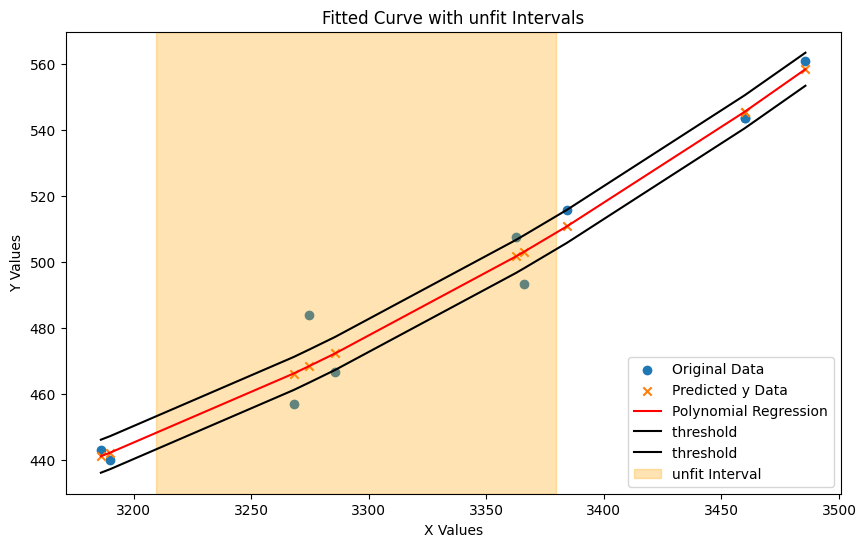

equation,
 y =  0.00039309561225338795x^2  -2.2315866131039077x^1 + 3560.914931757948 
unfit_points
 [(3186.0, 443.0555555555555), (3190.0, 440.16666666666646), (3268.0, 457.1249999999999), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3362.630202140309, 507.7222222222221), (3365.8949133594188, 493.4444444444443), (3384.285714285714, 515.6805555555555), (3459.868641699273, 543.5833333333335), (3460.0, 543.5833333333335), (3485.714285714286, 561.0277777777779)] 
local_unfit_interval
, [[3186.0, 3209.5], [3379.6880140541402, 3538.8234847879903]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

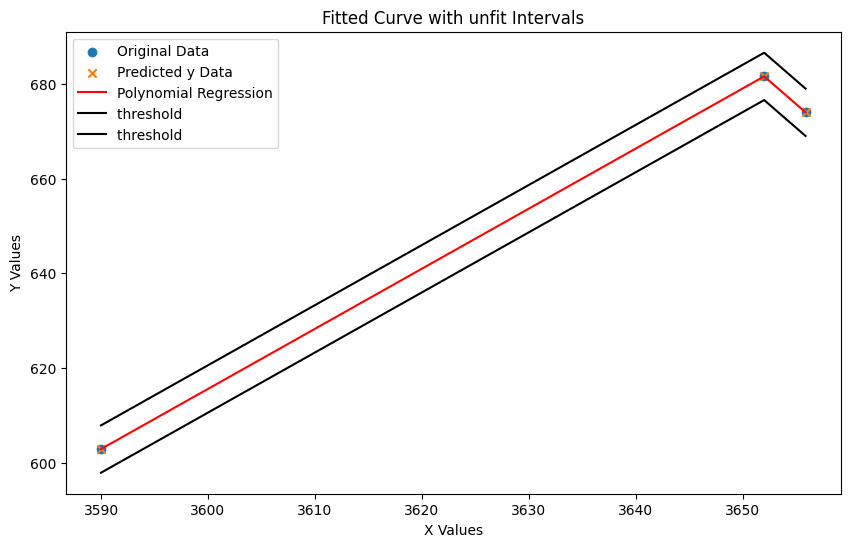

equation,
 y =  -3.349386825384677e-17x^6  -1.6047868028273264e-16x^5 + 2.6513798381402436e-10x^4 + 1.287306350734917e-06x^3 + 0.0035177256229342526x^2 + 0.07007237879514222x^1  -76789.35120367496 
unfit_points
 [(3590.0, 602.8888888888887), (3652.0, 681.5972222222223), (3655.868641699273, 674.0138888888888)] 
local_unfit_interval
, [[3564.8949133594188, 3686.824303281961]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3712.3308711969976, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


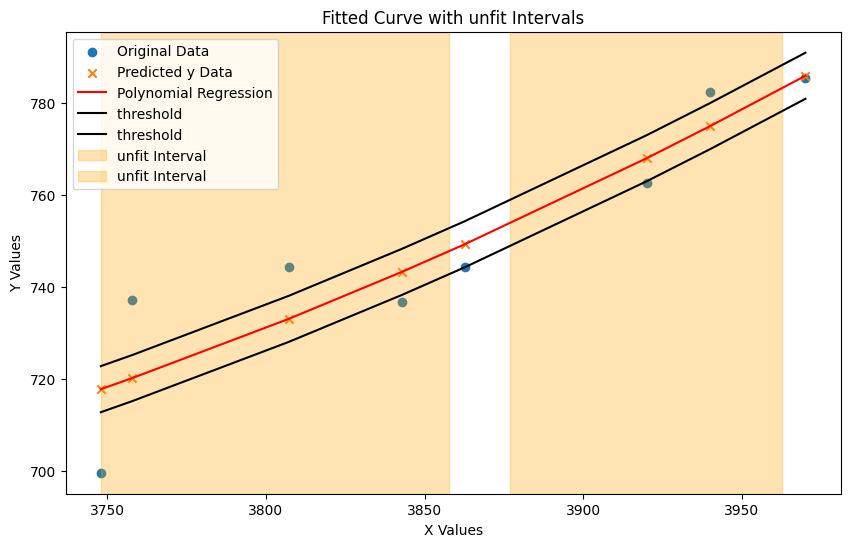

equation,
 y =  0.00029937979521105077x^2  -2.004205748347717x^1 + 4024.0729202068123 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3807.142857142857, 744.2916666666672), (3842.8012486992716, 736.7777777777779), (3862.6053661263277, 744.3611111111111), (3920.0, 762.4861111111111), (3940.0, 782.3472222222223), (3970.0, 785.3055555555554)] 
local_unfit_interval
, [[3712.3308711969976, 3748.0], [3857.6543367695635, 3876.9540245947455], [3962.5, 3970.0]]
DIFFERENCES 
each_interval  [3712.3308711969976, 3970.0] 
new_unfit_interval   [[3748.0, 3857.6543367695635], [3876.9540245947455, 3962.5]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3209.5, 3379.6880140541402], [3748.0, 3857.6543367695635], [3876.9540245947455, 3962.5]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3209.5, 3379.6880140541402], [3748.0, 3857.6543367695635], [3876.9540245947455, 3962.5]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


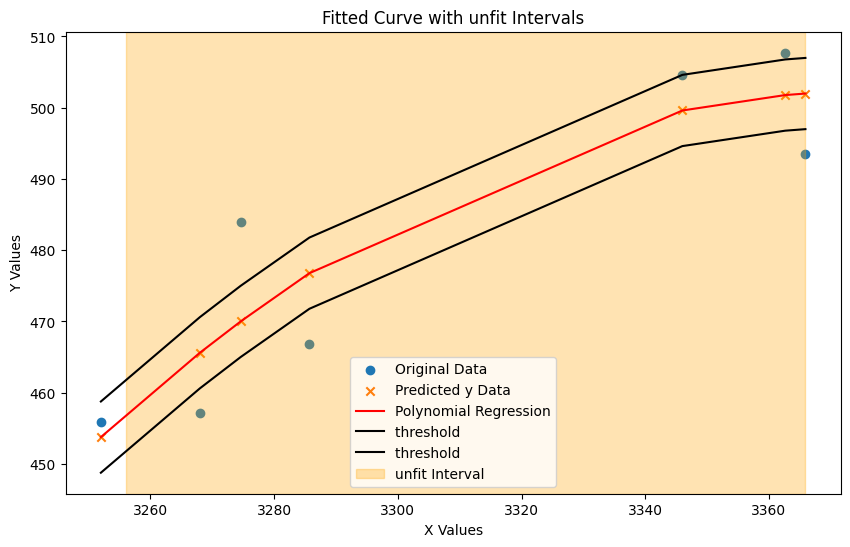

equation,
 y =  -0.003233516505722771x^2 + 21.82261361387035x^1  -36317.320196025874 
unfit_points
 [(3252.0, 455.86111111111114), (3268.0, 457.1249999999999), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3346.0, 504.65277777777766), (3362.630202140309, 507.7222222222221), (3365.8949133594188, 493.4444444444443)] 
local_unfit_interval
, [[3209.5, 3256.0], [3365.8949133594188, 3379.6880140541402]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


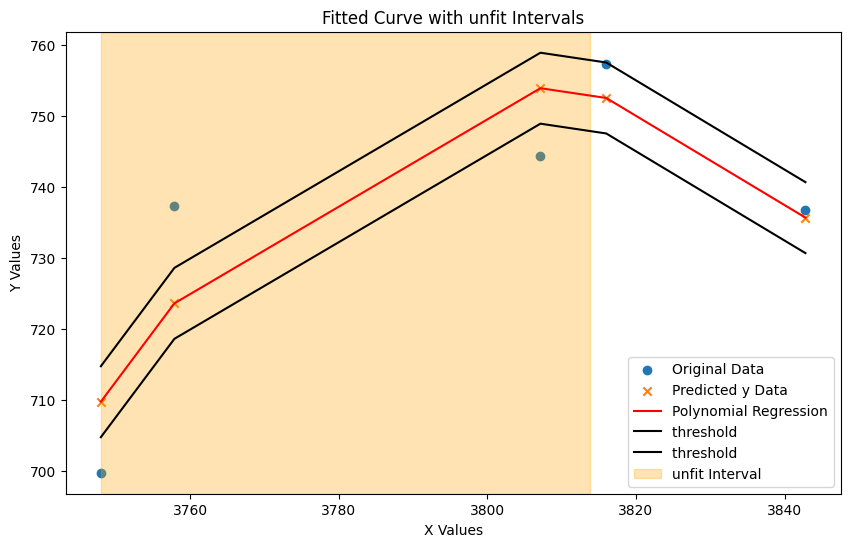

equation,
 y =  -0.013274511550058727x^2 + 101.03778485921862x^1  -191506.143103296 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3807.142857142857, 744.2916666666672), (3816.0, 757.3194444444445), (3842.8012486992716, 736.7777777777779)] 
local_unfit_interval
, [[3748.0, 3748.0], [3813.785714285714, 3857.6543367695635]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

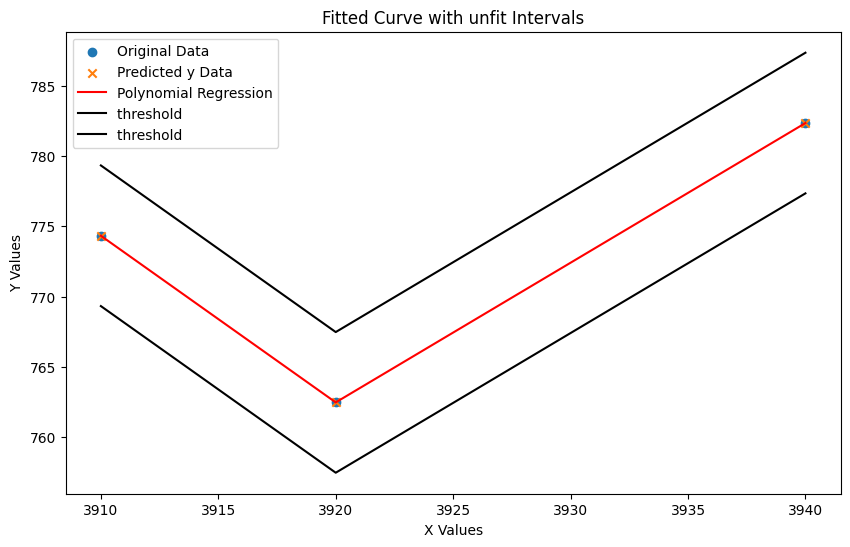

equation,
 y =  3.648944542847617e-17x^6  -2.6946144595873682e-17x^5  -3.3718039542891736e-10x^4  -1.7631565457514755e-06x^3  -0.005182181311672661x^2 + 0.0649638186872846x^1 + 133588.7050851291 
unfit_points
 [(3910.0, 774.3333333333336), (3920.0, 762.4861111111111), (3940.0, 782.3472222222223)] 
local_unfit_interval
, [[3876.9540245947455, 3962.5]]
DIFFERENCES 
each_interval  [3876.9540245947455, 3962.5] 
new_unfit_interval   []
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3256.0, 3365.8949133594188], [3748.0, 3813.785714285714]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3256.0, 3365.8949133594188], [3748.0, 3813.785714285714]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3256.0, 3365.8949133594188)
[MODC]: mod_ticks:  [3328]
[MODC]: mod_x:  [3328]
[MODC]: (interval_min_tick, interval_max_tick):  (3748.0, 3813.785714285714)
[MODC]: mod_ticks:  [3788]
[MODC]: mod_

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


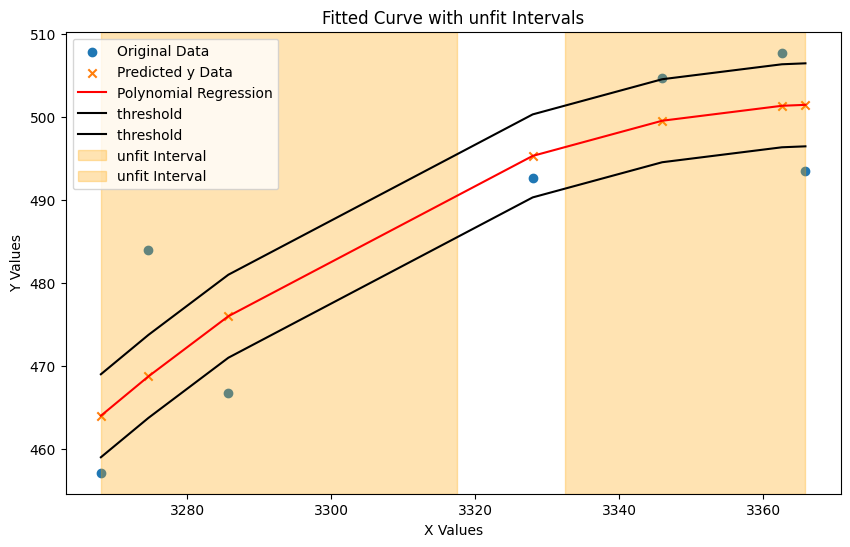

equation,
 y =  -0.0036714682941426705x^2 + 24.73877779191769x^1  -41171.70423277442 
unfit_points
 [(3268.0, 457.1249999999999), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3328, 492.65277777777777), (3346.0, 504.65277777777766), (3362.630202140309, 507.7222222222221), (3365.8949133594188, 493.4444444444443)] 
local_unfit_interval
, [[3256.0, 3268.0], [3317.4285714285716, 3332.5]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


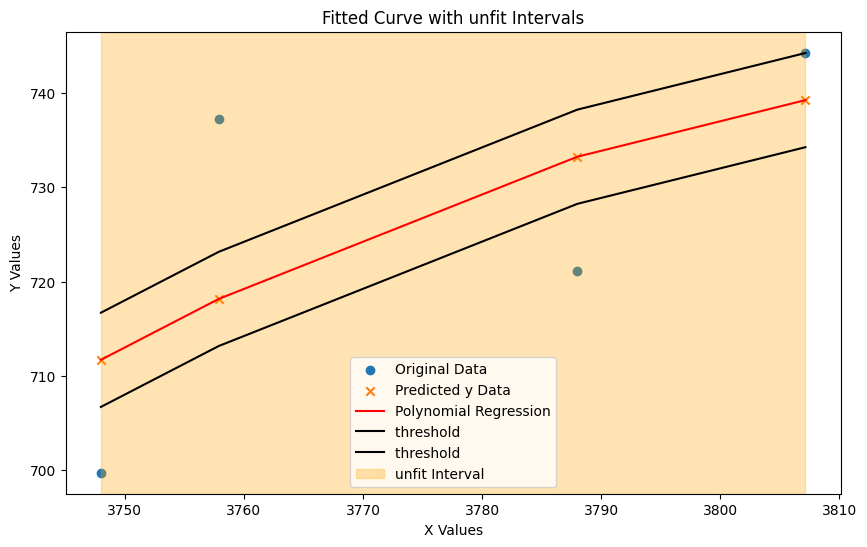

equation,
 y =  -0.0038055215421974194x^2 + 29.217419987420374x^1  -55337.120137611535 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3788, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0], [3807.142857142857, 3813.785714285714]]
DIFFERENCES 
each_interval  [3748.0, 3813.785714285714] 
new_unfit_interval   [[3748.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3317.4285714285716], [3332.5, 3365.8949133594188], [3748.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3317.4285714285716], [3332.5, 3365.8949133594188], [3748.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3317.4285714285716)
[MODC]: mod_ticks:  [3310]
[MODC]: mod_x:  [3310]
[MODC]: (interval_min_tick, interval_max_tick):  (3332.5, 336

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


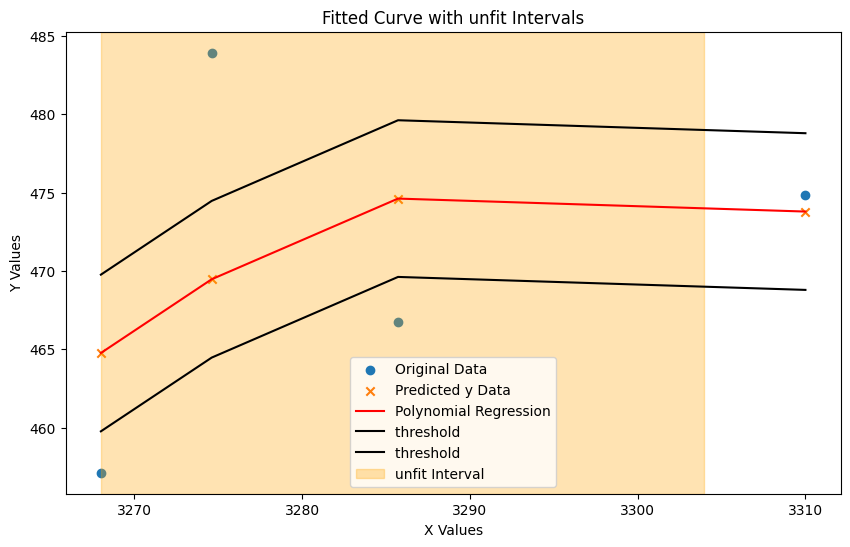

equation,
 y =  -0.014057964129718225x^2 + 92.68822199181115x^1  -152303.76077433172 
unfit_points
 [(3268.0, 457.1249999999999), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3310, 474.8333333333333)] 
local_unfit_interval
, [[3268.0, 3268.0], [3303.9285714285716, 3317.4285714285716]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

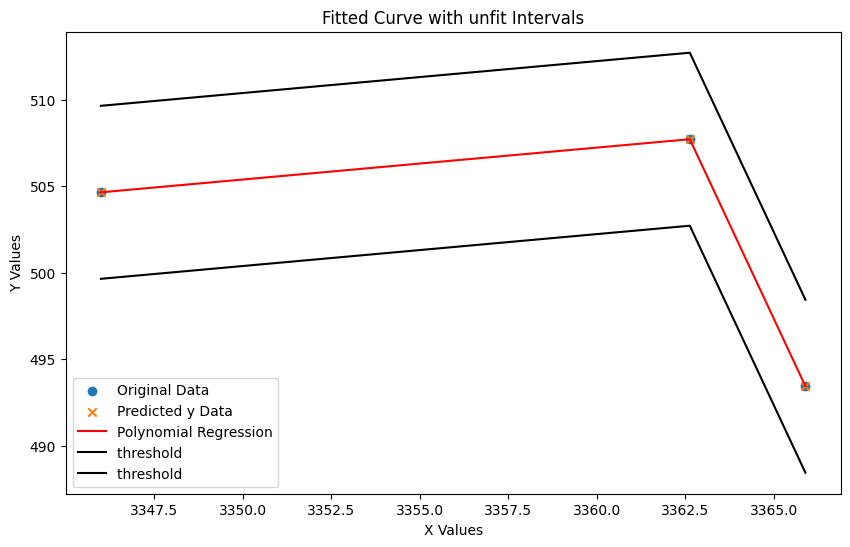

equation,
 y =  -2.1368492438086676e-16x^6  -1.0554832571310751e-15x^5 + 1.4413847792473966e-09x^4 + 6.462983247861112e-06x^3 + 0.016303233192711368x^2 + 0.17294966487357444x^1  -305068.12582473014 
unfit_points
 [(3346.0, 504.65277777777766), (3362.630202140309, 507.7222222222221), (3365.8949133594188, 493.4444444444443)] 
local_unfit_interval
, [[3332.5, 3365.8949133594188]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


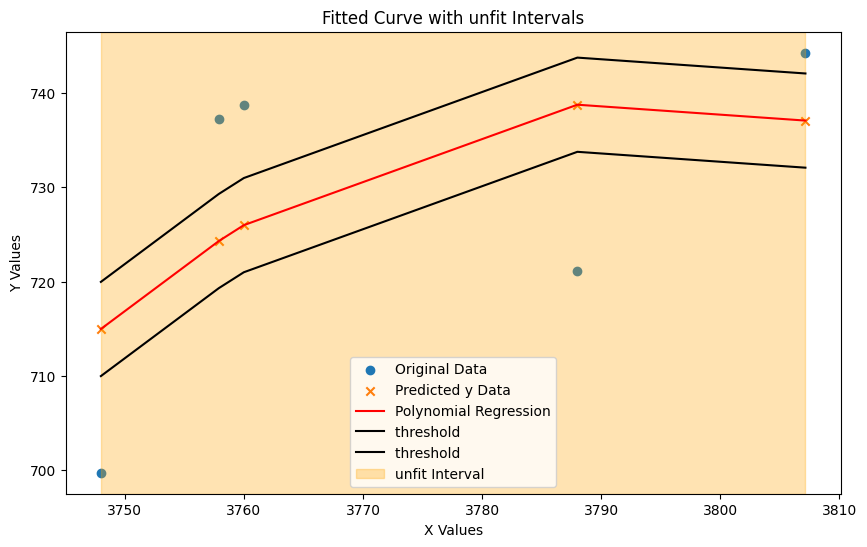

equation,
 y =  -0.011552010939497941x^2 + 87.65116804511074x^1  -165524.69317770118 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3788, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0]]
DIFFERENCES 
each_interval  [3748.0, 3807.142857142857] 
new_unfit_interval   [[3748.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3303.9285714285716], [3748.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3303.9285714285716], [3748.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3303.9285714285716)
[MODC]: mod_ticks:  [3292]
[MODC]: mod_x:  [3292]
[MODC]: (interval_min_tick, interval_max_tick):  (3748.0, 3807.142857142857)
MAIN mod outcome ([[], [3292], []], [[2600.0, 2656.785714285714], [326

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


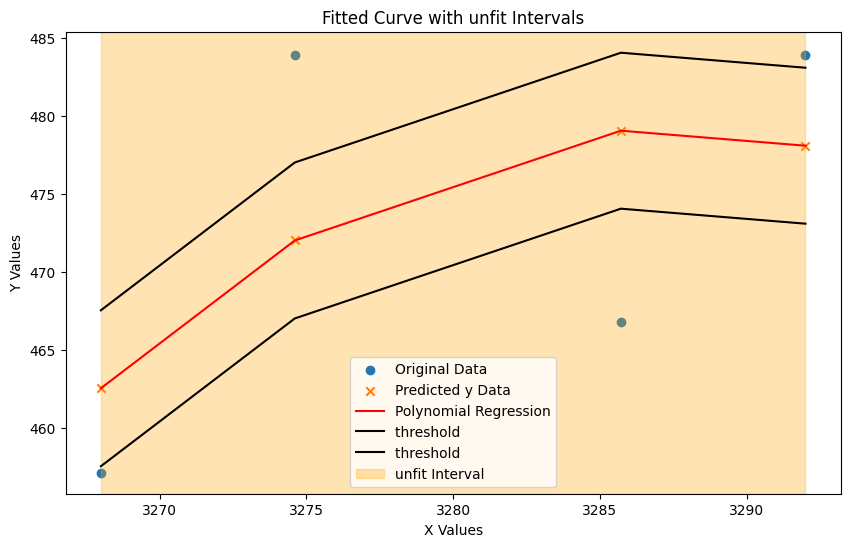

equation,
 y =  -0.04523074379561548x^2 + 297.36178878075674x^1  -488259.402937911 
unfit_points
 [(3268.0, 457.1249999999999), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0], [3292, 3303.9285714285716]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


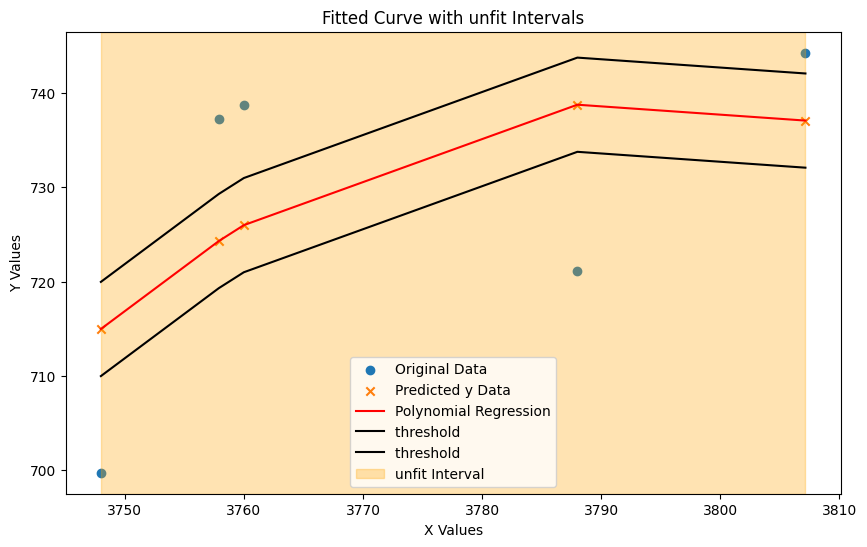

equation,
 y =  -0.011552010939497941x^2 + 87.65116804511074x^1  -165524.69317770118 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3788, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0]]
DIFFERENCES 
each_interval  [3748.0, 3807.142857142857] 
new_unfit_interval   [[3748.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
[MODC]: mod_ticks:  [3274]
[MODC]: mod_x:  [3274]
[MODC]: (interval_min_tick, interval_max_tick):  (3748.0, 3807.142857142857)
[MODC]: mod_ticks:  [3790]
[MODC]: mod_x:  [3790]
MAIN mod outcome ([[], [3274], [3790]], [[2600.0, 2656.7857142

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


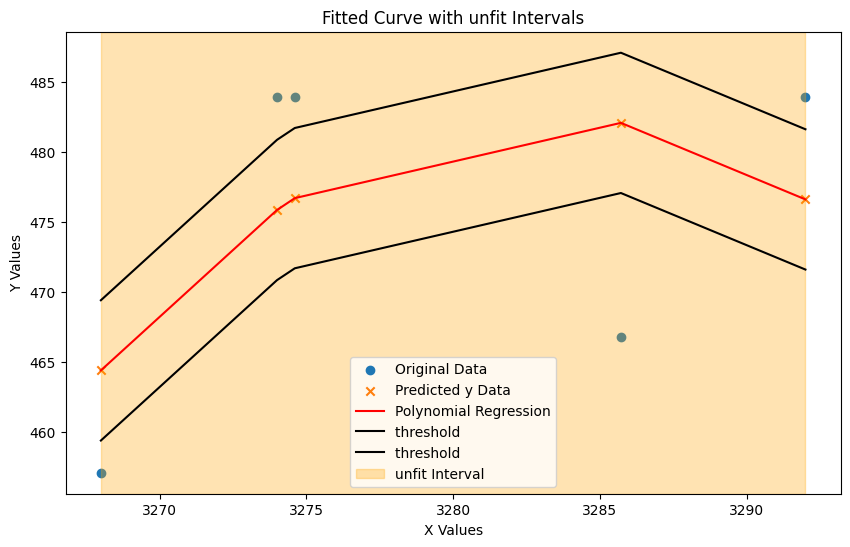

equation,
 y =  -0.07766370619510096x^2 + 509.9817596116074x^1  -836721.2582346913 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


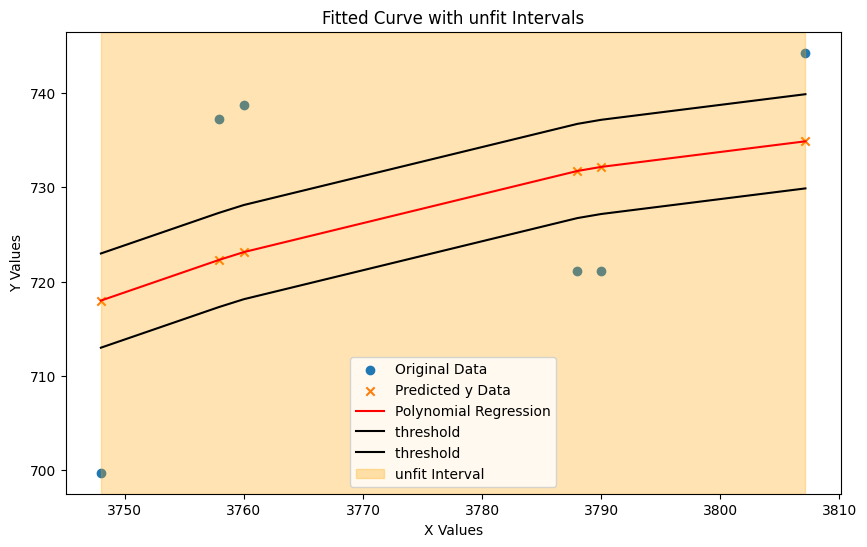

equation,
 y =  -0.003033725178241539x^2 + 23.206109481981443x^1  -43642.25126176712 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3788, 721.083333333333), (3790, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0]]
DIFFERENCES 
each_interval  [3748.0, 3807.142857142857] 
new_unfit_interval   [[3748.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
[MODC]: (interval_min_tick, interval_max_tick):  (3748.0, 3807.142857142857)
[MODC]: mod_ticks:  [3760]
[MODC]: mod_x:  [3760]
MAIN mod outcome ([[], [], [3760]], [[2600.0, 2656.785714285714], [3268.0, 3292], [374

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


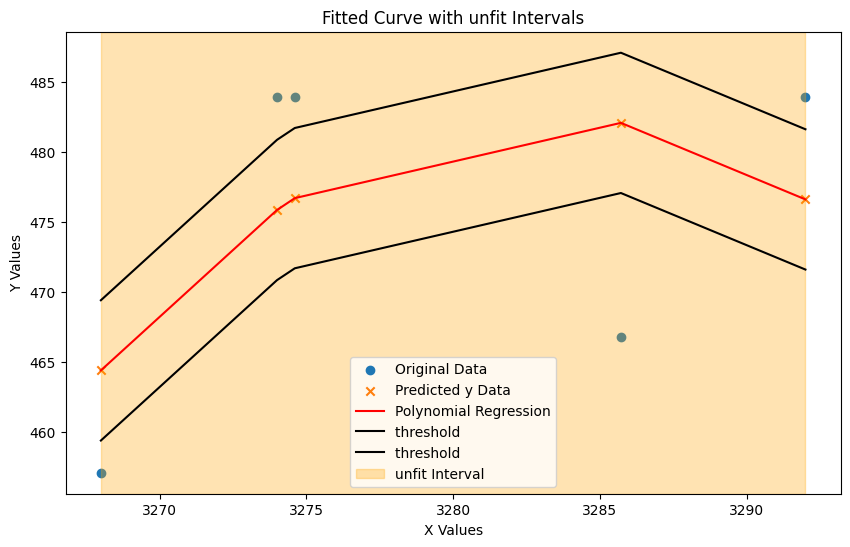

equation,
 y =  -0.07766370619510096x^2 + 509.9817596116074x^1  -836721.2582346913 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


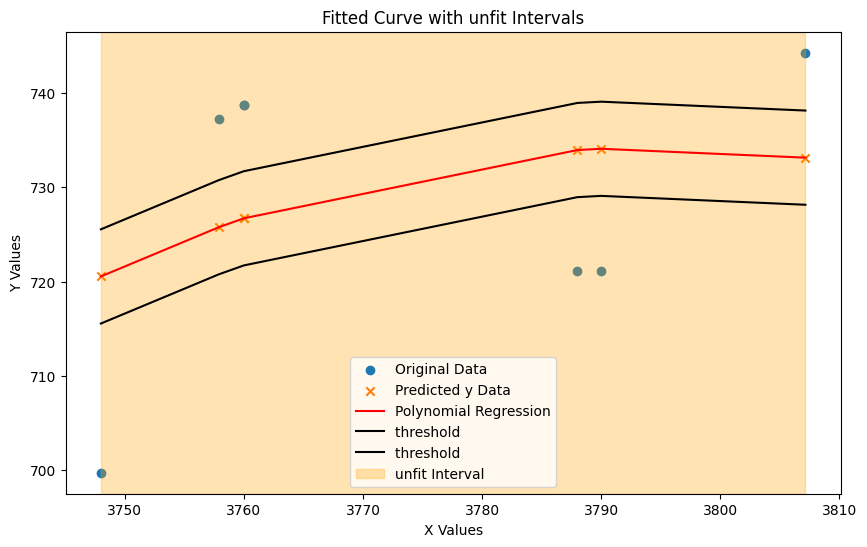

equation,
 y =  -0.006384307494672513x^2 + 48.447551940684505x^1  -91177.295717594 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3760, 738.75), (3788, 721.083333333333), (3790, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0]]
DIFFERENCES 
each_interval  [3748.0, 3807.142857142857] 
new_unfit_interval   [[3748.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
[MODC]: (interval_min_tick, interval_max_tick):  (3748.0, 3807.142857142857)
MAIN mod outcome ([[], [], []], [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]])
Simulator... [

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


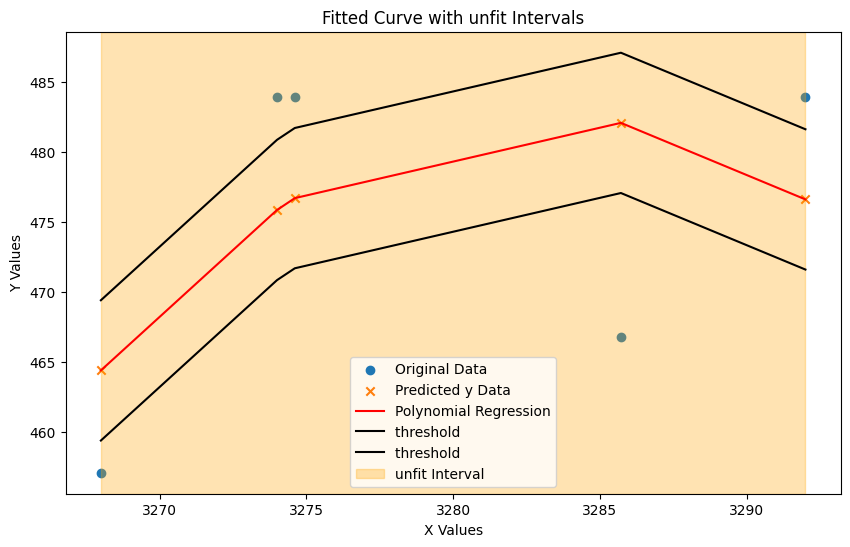

equation,
 y =  -0.07766370619510096x^2 + 509.9817596116074x^1  -836721.2582346913 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


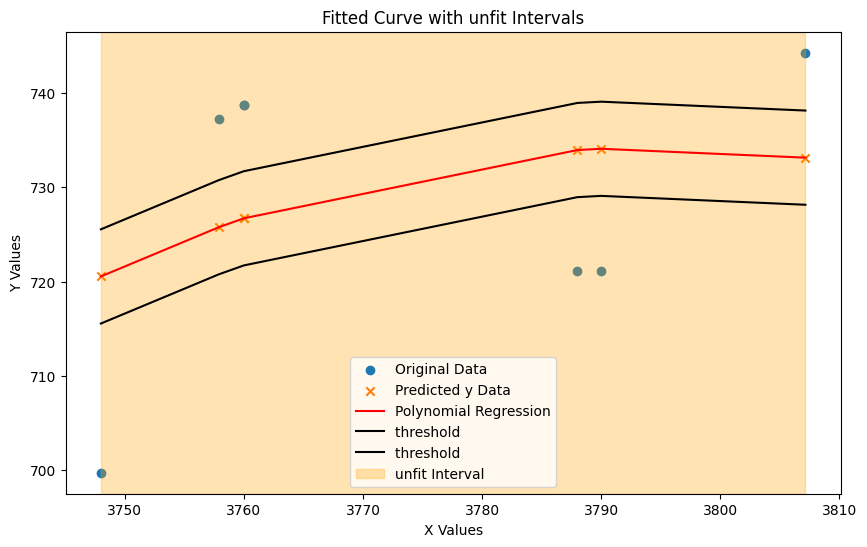

equation,
 y =  -0.006384307494672513x^2 + 48.447551940684505x^1  -91177.295717594 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3760, 738.75), (3788, 721.083333333333), (3790, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0]]
DIFFERENCES 
each_interval  [3748.0, 3807.142857142857] 
new_unfit_interval   [[3748.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
[MODC]: (interval_min_tick, interval_max_tick):  (3748.0, 3807.142857142857)
[MODC]: mod_ticks:  [3780]
[MODC]: mod_x:  [3780]
MAIN mod outcome ([[], [], [3780]], [[2600.0, 2656.785714285714], [3268.

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


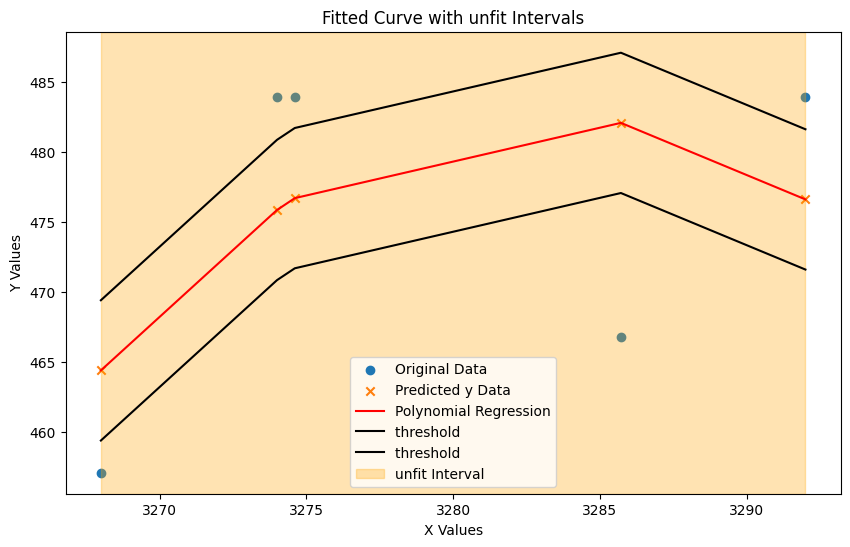

equation,
 y =  -0.07766370619510096x^2 + 509.9817596116074x^1  -836721.2582346913 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3748.0, 3748.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


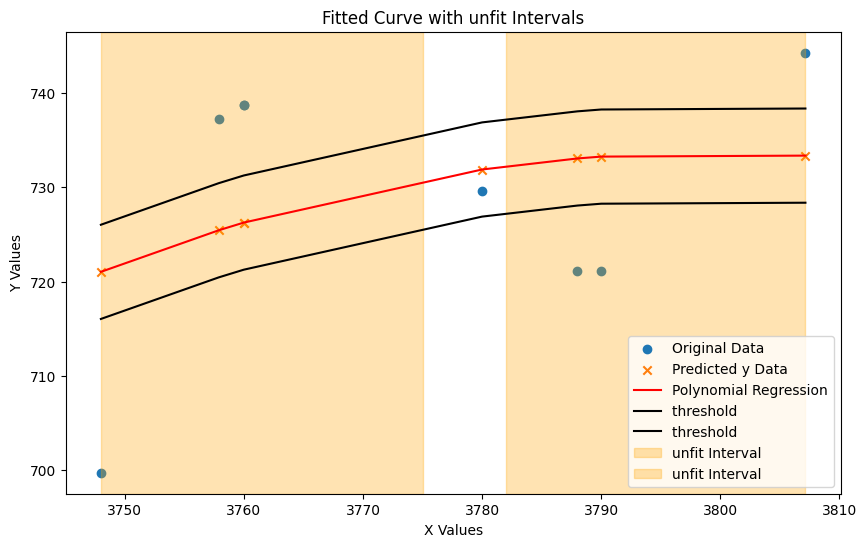

equation,
 y =  -0.004822349644274248x^2 + 36.642166045245496x^1  -68871.83184971519 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3760, 738.75), (3780, 729.6527777777776), (3788, 721.083333333333), (3790, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3748.0, 3748.0], [3775.0, 3782.0]]
DIFFERENCES 
each_interval  [3748.0, 3807.142857142857] 
new_unfit_interval   [[3748.0, 3775.0], [3782.0, 3807.142857142857]]
MAIN interval list from VAL: [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3775.0], [3782.0, 3807.142857142857]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2656.785714285714], [3268.0, 3292], [3748.0, 3775.0], [3782.0, 3807.142857142857]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2656.785714285714)
[MODC]: mod_ticks:  [2656]
[MODC]: mod_x:  [2656]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
[MODC]: mod_ticks:  [3280]
[MODC]: mod_x:  [3280

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

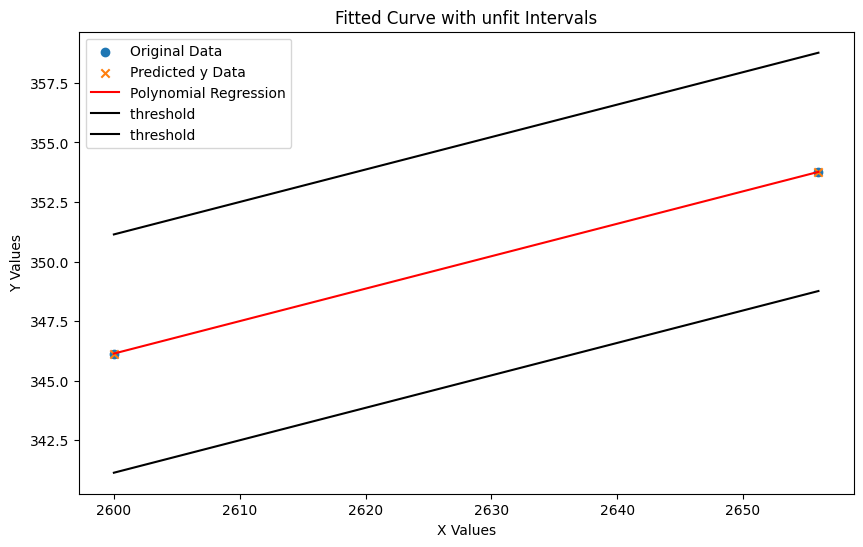

equation,
 y =  1.7459945193141085e-05x^2 + 0.04439124235056584x^1 + 112.692429271784 
unfit_points
 [(2600.0, 346.1388888888888), (2656, 353.76388888888886)] 
local_unfit_interval
, [[2600.0, 2656.785714285714]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3268.0, 3268.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


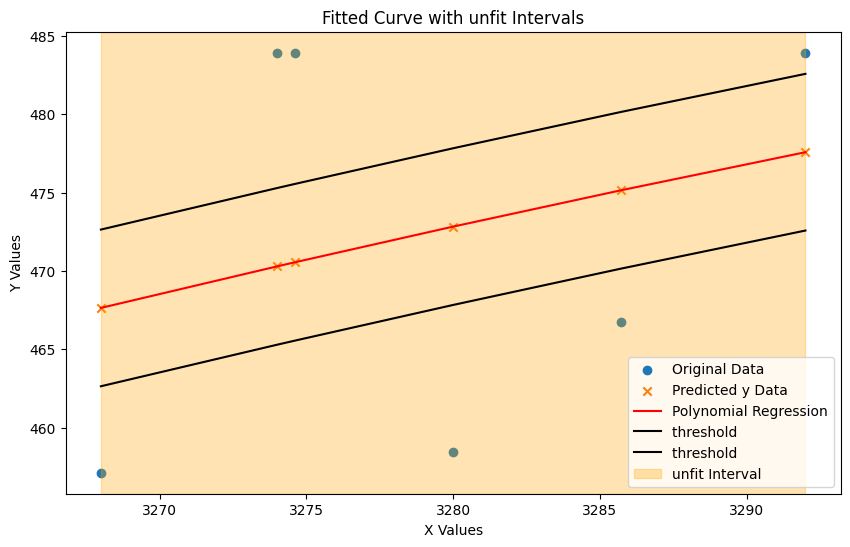

equation,
 y =  -0.0015327830953417486x^2 + 10.469176920624903x^1  -17375.773450185578 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3280, 458.4166666666666), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

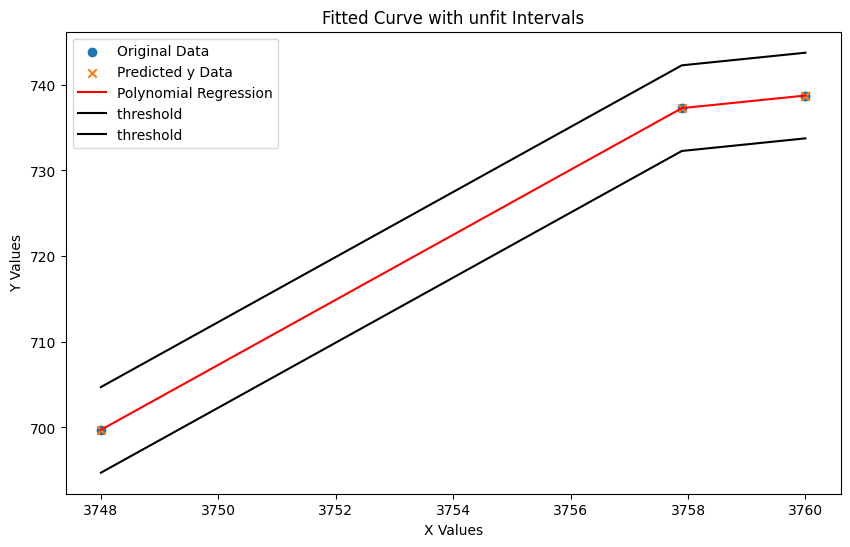

equation,
 y =  -1.5502226776046665e-16x^6 + 4.029732761024805e-16x^5 + 1.3156510780574318e-09x^4 + 6.588674933142871e-06x^3 + 0.018563484045797236x^2  -0.026109064990138073x^1  -437059.7175210841 
unfit_points
 [(3748.0, 699.7083333333335), (3757.8949133594188, 737.2777777777777), (3760, 738.75), (3760, 738.75)] 
local_unfit_interval
, [[3748.0, 3775.0]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

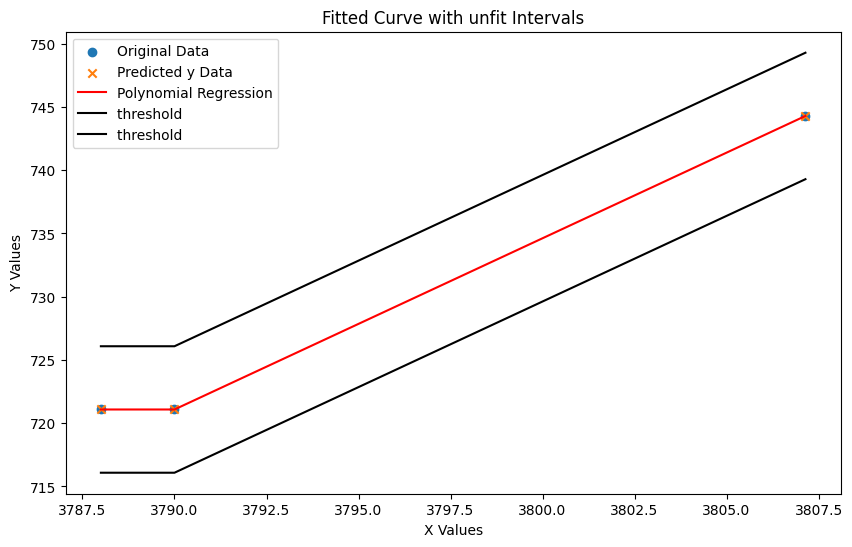

equation,
 y =  4.0407811240716247e-17x^6 + 2.419257392632626e-16x^5  -3.4786194555458945e-10x^4  -1.762000352379307e-06x^3  -0.005016487578088555x^2 + 0.005769719306884622x^1 + 120507.08434409354 
unfit_points
 [(3788, 721.083333333333), (3790, 721.083333333333), (3807.142857142857, 744.2916666666672)] 
local_unfit_interval
, [[3782.0, 3807.142857142857]]
DIFFERENCES 
each_interval  [3782.0, 3807.142857142857] 
new_unfit_interval   []
MAIN interval list from VAL: [[3268.0, 3292]]
Modifier...
[MODC]: intervals list:  [[3268.0, 3292]]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
MAIN mod outcome ([[]], [[3268.0, 3292]])
Simulator... [[]]
 IN SIMULATE arrays: []
 IN SIMULATE arrays: [[]]
MODX [] and sim_y_list []
MAIN modx []
Validator...
What are POINTS  [[3268.0, 457.1249999999999], [3274, 483.9305555555554], [3274.6053661263277, 483.9305555555554], [3280, 458.4166666666666], [3285.714285714286, 466.76388888888874], [3292, 483.8888888888888]]
       *** USING local_e

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


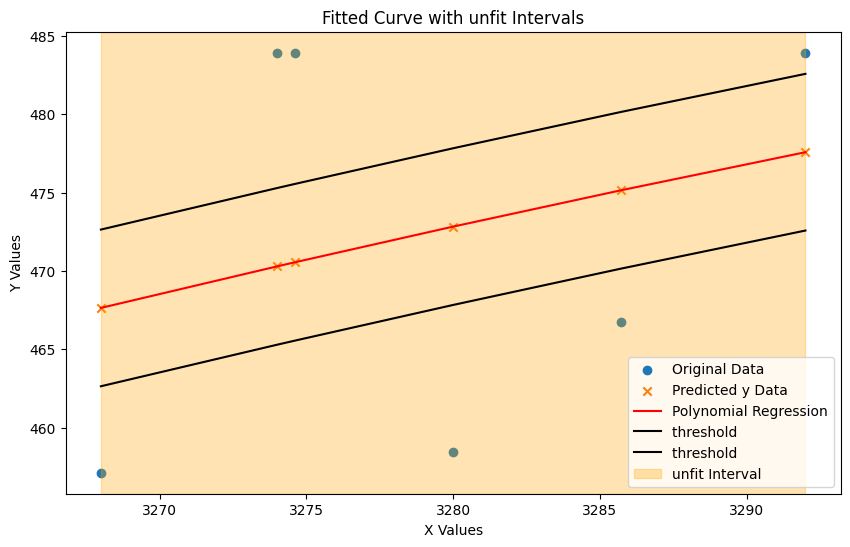

equation,
 y =  -0.0015327830953417486x^2 + 10.469176920624903x^1  -17375.773450185578 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3280, 458.4166666666666), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
DIFFERENCES 
each_interval  [3268.0, 3292] 
new_unfit_interval   [[3268.0, 3292]]
MAIN interval list from VAL: [[3268.0, 3292]]
Modifier...
[MODC]: intervals list:  [[3268.0, 3292]]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
MAIN mod outcome ([[]], [[3268.0, 3292]])
Simulator... [[]]
 IN SIMULATE arrays: []
 IN SIMULATE arrays: [[]]
MODX [] and sim_y_list []
MAIN modx []
Validator...
What are POINTS  [[3268.0, 457.1249999999999], [3274, 483.9305555555554], [3274.6053661263277, 483.9305555555554], [3280, 458.4166666666666], [3285.714285714286, 466.76388888888874], [3292, 483.8888888888888]]
       *** USING local_exploration_validator

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


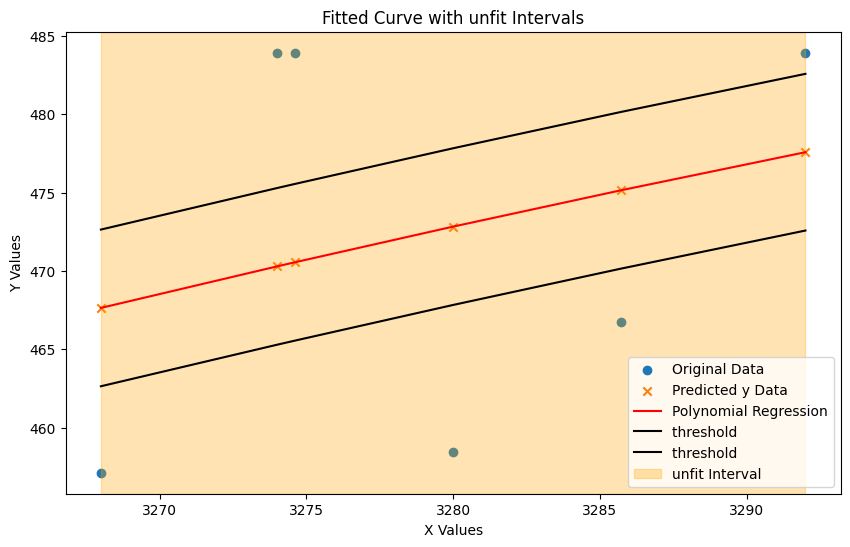

equation,
 y =  -0.0015327830953417486x^2 + 10.469176920624903x^1  -17375.773450185578 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3280, 458.4166666666666), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
DIFFERENCES 
each_interval  [3268.0, 3292] 
new_unfit_interval   [[3268.0, 3292]]
MAIN interval list from VAL: [[3268.0, 3292]]
Modifier...
[MODC]: intervals list:  [[3268.0, 3292]]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
MAIN mod outcome ([[]], [[3268.0, 3292]])
Simulator... [[]]
 IN SIMULATE arrays: []
 IN SIMULATE arrays: [[]]
MODX [] and sim_y_list []
MAIN modx []
Validator...
What are POINTS  [[3268.0, 457.1249999999999], [3274, 483.9305555555554], [3274.6053661263277, 483.9305555555554], [3280, 458.4166666666666], [3285.714285714286, 466.76388888888874], [3292, 483.8888888888888]]
       *** USING local_exploration_validator

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


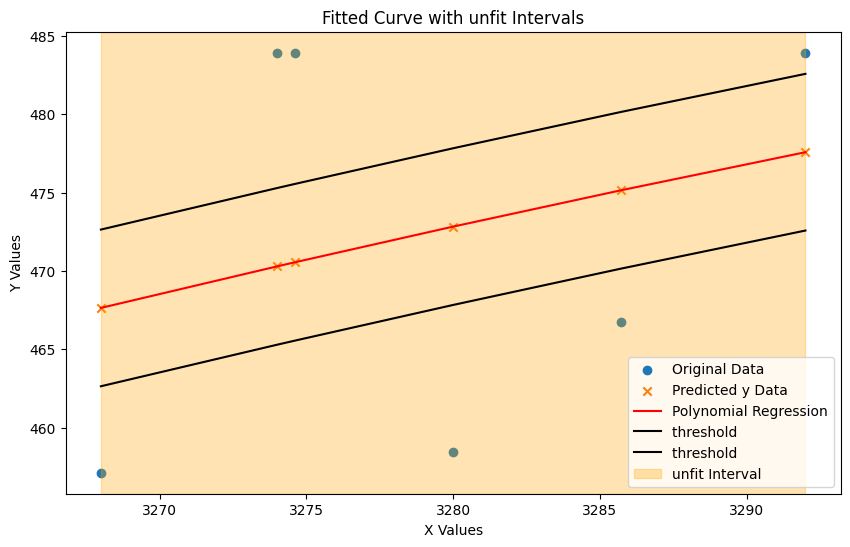

equation,
 y =  -0.0015327830953417486x^2 + 10.469176920624903x^1  -17375.773450185578 
unfit_points
 [(3268.0, 457.1249999999999), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3280, 458.4166666666666), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0]]
DIFFERENCES 
each_interval  [3268.0, 3292] 
new_unfit_interval   [[3268.0, 3292]]
MAIN interval list from VAL: [[3268.0, 3292]]
Modifier...
[MODC]: intervals list:  [[3268.0, 3292]]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3292)
[MODC]: mod_ticks:  [3270]
[MODC]: mod_x:  [3270]
MAIN mod outcome ([[3270]], [[3268.0, 3292]])
Simulator... [[3270]]
 IN SIMULATE arrays: [[3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3270,

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


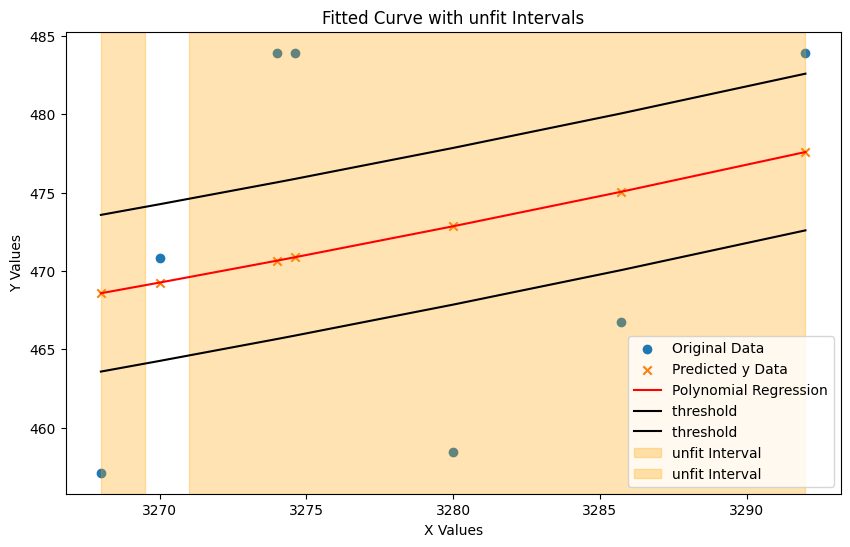

equation,
 y =  0.001614710757445261x^2  -10.216970784948964x^1 + 16612.814121029656 
unfit_points
 [(3268.0, 457.1249999999999), (3270, 470.8194444444445), (3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3280, 458.4166666666666), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3268.0, 3268.0], [3269.5, 3271.0]]
DIFFERENCES 
each_interval  [3268.0, 3292] 
new_unfit_interval   [[3268.0, 3269.5], [3271.0, 3292]]
MAIN interval list from VAL: [[3268.0, 3269.5], [3271.0, 3292]]
Modifier...
[MODC]: intervals list:  [[3268.0, 3269.5], [3271.0, 3292]]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3269.5)
[MODC]: (interval_min_tick, interval_max_tick):  (3271.0, 3292)
MAIN mod outcome ([[], []], [[3268.0, 3269.5], [3271.0, 3292]])
Simulator... [[], []]
 IN SIMULATE arrays: []
 IN SIMULATE arrays: [[], []]
MODX [] and sim_y_list []
MAIN modx []
Validator...
What are POINTS  [[3268.0, 457.1249999999999], [3274, 483.930

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


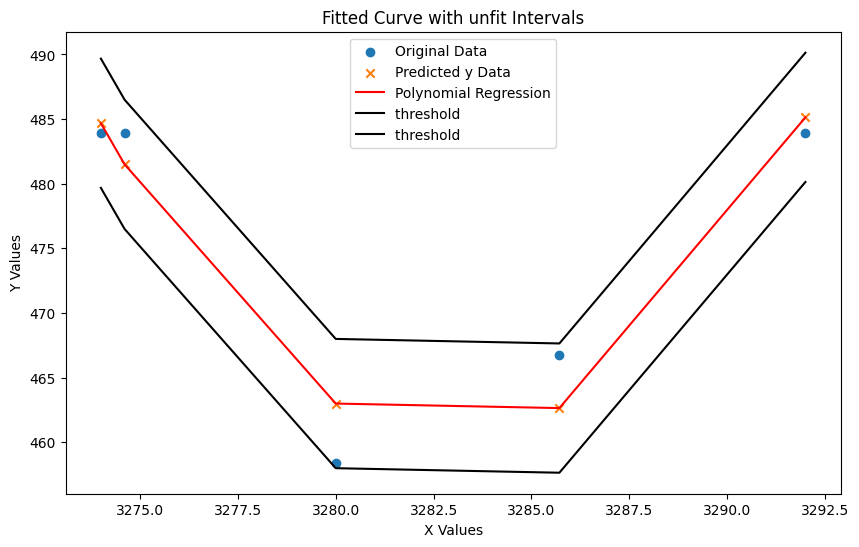

equation,
 y =  0.3032769613812907x^2  -1991.291202302899x^1 + 3269123.2725028507 
unfit_points
 [(3274, 483.9305555555554), (3274.6053661263277, 483.9305555555554), (3280, 458.4166666666666), (3285.714285714286, 466.76388888888874), (3292, 483.8888888888888)] 
local_unfit_interval
, [[3271.0, 3292]]
DIFFERENCES 
each_interval  [3271.0, 3292] 
new_unfit_interval   []
MAIN interval list from VAL: [[3268.0, 3269.5]]
Modifier...
[MODC]: intervals list:  [[3268.0, 3269.5]]
[MODC]: (interval_min_tick, interval_max_tick):  (3268.0, 3269.5)
MAIN mod outcome ([[]], [[3268.0, 3269.5]])
Simulator... [[]]
 IN SIMULATE arrays: []
 IN SIMULATE arrays: [[]]
MODX [] and sim_y_list []
MAIN modx []
Validator...
What are POINTS  [(3268.0, 457.1249999999999)]
This is UNFIT POINTS  [(3268.0, 457.1249999999999)]


UnboundLocalError: local variable 'new_unfit_interval' referenced before assignment

In [1]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True
# Initialize interval list for the first iteration
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]
#intervals_list=[[2900, 3200]]


while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifier'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    print("MAIN mod outcome", mod_outcome)  

    
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = SimulatorController.sumo_simulate(mod_x_list,selected_simulator=components['sumo_simulator'])
    print(f"MODX {mod_x} and sim_y_list {sim_y_list}")
    assert len(mod_x) == len(sim_y_list)

    print("MAIN modx", mod_x)  

    # Calls Validator controller
    intervals_list =  validator_controller.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[mds["domain_min_interval"], mds["domain_max_interval"]])
    print("MAIN interval list from VAL:", intervals_list)
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

In [ ]:
 mod_ticks = np.arange(mds["domain_min_interval"], mds["domain_max_interval"], mds["modifier_data_point"])


In [ ]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

save_object(validator_controller,"vc_vsl-test.pkl")

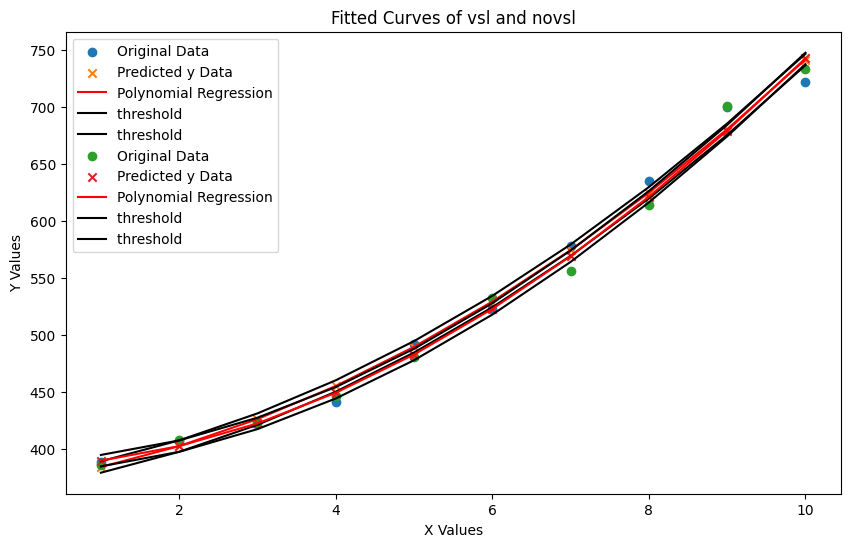

In [12]:
import matplotlib.pyplot as plt
from global_settings import vfs
import pickle

plt.figure(figsize=(10, 6))
#vsl = validator_controller_vsl
#nvsl = validator_controller_novsl

# How to read pickle file from
vsl = pickle.load(open("vc_vsl.pkl", "rb"))
nvsl = pickle.load(open("vc_novsl.pkl", "rb"))

# Plot for vsl
#for controller in [validator_controller_vsl,validator_controller_novsl]:
# controller= validator_controller_novsl
#    print(f"X values and Y values {controller.x_values}{controller.y_values} predicted values {controller.predicted_values}")
#    plt.scatter(controller.x_values, controller.y_values, label=f'Original Data ')
#    plt.scatter(controller.x_values, controller.predicted_values, label=f'Predicted y Data ', marker='x')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1], color='red', label=f'Polynomial Regression')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(vsl.x_values, vsl.y_values, label=f'Original Data ')
plt.scatter(vsl.x_values, vsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(nvsl.x_values, nvsl.y_values, label=f'Original Data ')
plt.scatter(nvsl.x_values, nvsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Fitted Curves of vsl and novsl')
plt.legend()
plt.show()

In [1]:
from components_configuration import components
from modifier_controller import ModifierController
from global_settings import simexSettings,mds

# Initialize interval list for the first iteration
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]

mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifier'], do_plot=simexSettings['do_plot'])
mod_x_list = mod_outcome[0]
checked_intervals = mod_outcome[1]
print("MAIN mod outcome", mod_outcome)

# Static tick does not work?

Modifier...
[MODC]: intervals list:  [[2500, 5000]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 5000)
[MODC]: mod_ticks:  [2510, 2520, 2530, 2540, 2550, 2560, 2570, 2580, 2590, 2600, 2610, 2620, 2630, 2640, 2650, 2660, 2670, 2680, 2690, 2700, 2710, 2720, 2730, 2740, 2750, 2760, 2770, 2780, 2790, 2800, 2810, 2820, 2830, 2840, 2850, 2860, 2870, 2880, 2890, 2900, 2910, 2920, 2930, 2940, 2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040, 3050, 3060, 3070, 3080, 3090, 3100, 3110, 3120, 3130, 3140, 3150, 3160, 3170, 3180, 3190, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3270, 3280, 3290, 3300, 3310, 3320, 3330, 3340, 3350, 3360, 3370, 3380, 3390, 3400, 3410, 3420, 3430, 3440, 3450, 3460, 3470, 3480, 3490, 3500, 3510, 3520, 3530, 3540, 3550, 3560, 3570, 3580, 3590, 3600, 3610, 3620, 3630, 3640, 3650, 3660, 3670, 3680, 3690, 3700, 3710, 3720, 3730, 3740, 3750, 3760, 3770, 3780, 3790, 3800, 3810, 3820, 3830, 3840, 3850, 3860, 3870, 3880, 3890, 3900, 3910, 3920, 3930, 3940, 3